# WordCloudの作成

非常に簡単に作成できた。
.txtでWordcloudにしたい情報を作成し、
wc.read_file('(作成した.txt)')で出力される。

- https://resanaplaza.com/2022/05/21/%E3%80%90%E5%AE%9F%E8%B7%B5%E3%80%91python%E3%81%A7wordcloud%EF%BC%88%E3%83%AF%E3%83%BC%E3%83%89%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%EF%BC%89%E3%81%97%E3%82%88%E3%81%86%E3%81%9C%EF%BC%81/
- https://resanaplaza.com/ipa%e3%83%95%e3%82%a9%e3%83%b3%e3%83%88%e3%81%ae%e3%83%80%e3%82%a6%e3%83%b3%e3%83%ad%e3%83%bc%e3%83%89%e6%96%b9%e6%b3%95%e3%81%a8%e4%bd%bf%e3%81%84%e6%96%b9/


In [1]:
import sys, pprint
pprint.pprint(sys.path)

['/Users/yamaguchitatsuya/programing/python/word_cloud_sample',
 '/Users/yamaguchitatsuya/.vscode/extensions/ms-toolsai.jupyter-2022.8.1002431955/pythonFiles',
 '/Users/yamaguchitatsuya/.vscode/extensions/ms-toolsai.jupyter-2022.8.1002431955/pythonFiles/lib/python',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/yamaguchitatsuya/Library/Python/3.9/lib/python/site-packages',
 '/usr/local/lib/python3.9/site-packages']


In [2]:
import codecs
from wordcloud import WordCloud
from janome.tokenizer import Tokenizer
import re
import matplotlib.pyplot as plt

class WordCloudMaker: 
    def __init__(self,text=None,font_path=None,width=800,height=600,min_font_size=15):
        """
        コンストラクタ 
        """
        self.font_path = font_path         # フォントのパス
        self.text = text                   # クラウド化したいテキスト
        self.background_color = 'white'    # 画像の背景色
        self.width = width                 # 画像の横ピクセル数
        self.height = height               # 画像の縦ピクセル数
        self.min_font_size = min_font_size # 最小のフォントサイズ
 
    def create(self,path,exclusion=[]):
        """
          ワードクラウドの画像生成
 
        Parameters:
            path : str         画像の出力パス
            exclusion : [str]  除外ワードのリスト
        """      
        # 名詞の抽出
        words = self.extract_words(self.text,exclusion)
        # ワードクラウドの画像生成
        words = self.generate_wordcloud(path,words)
 
    def generate_wordcloud(self,path,words):
        """
        ワードクラウドの画像生成
 
        Parameters:
            path : str        画像の出力パス
            words : [str]     ワードクラウド化したい名詞リスト
        """
        #ワードクラウドの画像生成
        wordcloud = WordCloud(
                background_color=self.background_color, # 背景色 
                font_path=self.font_path,               # フォントのパス
                width=self.width,                       # 画像の横ピクセル数
                height=self.width,                      # 画像の縦ピクセル数
                min_font_size=self.min_font_size        # 最小のフォントサイズ
            )
        # ワードクラウドの作成
        wordcloud.generate(words)
        # 画像保存
        wordcloud.to_file(path) 
        # ワードクラウドの描画
        fig = plt.figure(figsize=(12,8))
        plt.imshow(wordcloud)
        plt.axis("off")
        fig.tight_layout()
 
    def extract_words(self,text,exclusion=[]):
        """
        形態素解析により一般名詞と固有名詞のリストを作成
        ---------------
        Parameters:
            text : str         テキスト
            exclusion : [str]  除外したいワードのリスト
        """
        token = Tokenizer().tokenize(text)
        words = []
    
        for line in token:
            tkn = re.split('\t|,', str(line))
            # 名詞のみ対象
            if tkn[0] not in exclusion and tkn[1] in ['名詞'] and tkn[2] in ['一般', '固有名詞'] :
                words.append(tkn[0])
    
        return ' ' . join(words)
 
    def read_file(self,filename):
        '''
        ファイルの読み込み
 
        Parameters:
        --------
            filename : str   要約したい文書が書かれたファイル名 
        '''
        
        with codecs.open(filename,'r','utf-8','ignore') as f:
            self.read_text(f.read())
 
    def read_text(self,text):
        '''
        テキストの読み込み
        '''
        self.text = text

In [3]:
wc = WordCloudMaker(font_path="/System/Library/Fonts/ipaexg.ttf")

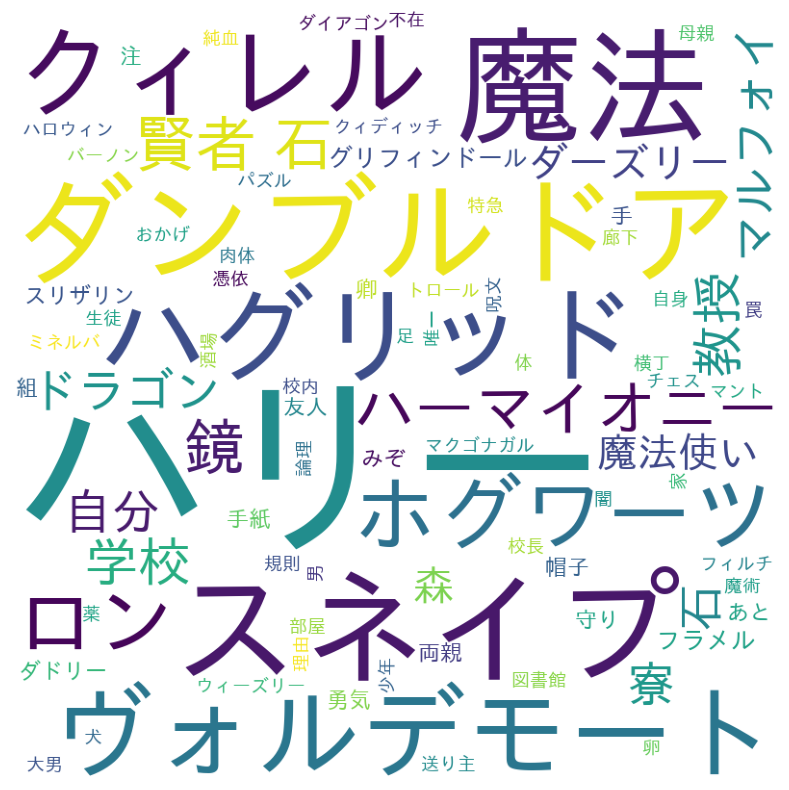

In [5]:
wc.read_file('wikisample.txt')
wc.create('wordcloud1.png')